### Iter-version token label check

/tmp/ipykernel_3972390/3891274331.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  losses_cur_train = torch.load(f"results/loss/token_losses_{dataset_name_tag}_{cur_trai

#### all token counting: 5194741

Dataset: filtered-cured-50k-iter-split-token-ranking-sample_1 -- Token proportion with positive loss diff : 20.18%
Dataset: filtered-cured-50k-iter-split-token-ranking-sample_1 -- selected Token proportion with positive loss diff: 0.35%


/tmp/ipykernel_3972390/3891274331.py:159: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 30)
/tmp/ipykernel_3972390/3891274331.py:160: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 30)


#### all token counting: 5092345

Dataset: filtered-cured-50k-iter-split-token-ranking-sample_2 -- Token proportion with positive loss diff : 25.39%
Dataset: filtered-cured-50k-iter-split-token-ranking-sample_2 -- selected Token proportion with positive loss diff: 0.01%
#### all token counting: 4820634

Dataset: filtered-cured-50k-iter-split-token-ranking-sample_3 -- Token proportion with positive loss diff : 41.71%
Dataset: filtered-cured-50k-iter-split-token-ranking-sample_3 -- selected Token proportion with positive loss diff: 0.16%
#### all token counting: 4366465

Dataset: filtered-cured-50k-iter-split-token-ranking-sample_4 -- Token proportion with positive loss diff : 22.79%
Dataset: filtered-cured-50k-iter-split-token-ranking-sample_4 -- selected Token proportion with positive loss diff: 0.11%


/tmp/ipykernel_3972390/3891274331.py:165: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/jlpang/LLM_token_selection/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


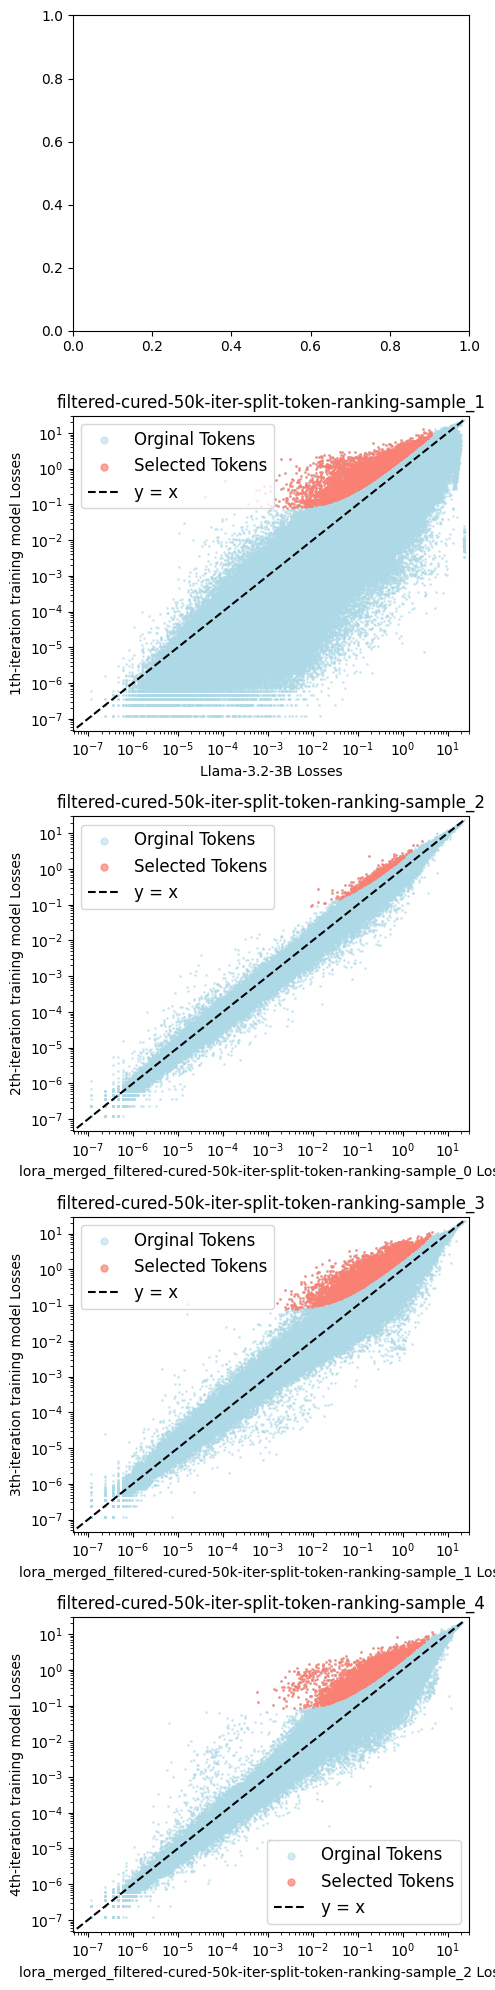

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

def get_global_top_k_indices(data, k):
    flattened = [(value, idx) for idx, value in enumerate(data)]
    top_k = sorted(flattened, key=lambda x: x[0], reverse=True)[:k]  ##loss
    top_k_indices = [item[1] for item in top_k]
    return top_k_indices


def get_half_positive_indices(data):
    selected_flattened = [(value, idx) for idx, value in enumerate(data) if value > 0]
    top_half_positive = sorted(selected_flattened, key=lambda x: x[0], reverse=True)[:int(len(selected_flattened)/2)] ##loss

    top_half_positive_indices = [item[1] for item in top_half_positive]
    return top_half_positive_indices

def get_curve_positive_indices(losses_pre, losses_cur):
    
    alpha = 2
    beta = 0.07
    curve_positive_indices=[]
    
    for idx, (sample_losses_pre, sample_losses_cur) in enumerate(zip(losses_pre, losses_cur)):
            if sample_losses_pre > alpha * sample_losses_cur + beta and sample_losses_cur <5: #linear split
                curve_positive_indices.append(idx)

    return curve_positive_indices

# Data and training parameters
###################################################
loss_path="results/loss/"
# ref_model_name_or_path = "meta-llama/Llama-3.1-8B-Instruct"
base_model_name_or_path = "meta-llama/Llama-3.2-3B"
# dataset_name = "alpaca_52k-active-split"
# dataset_name="filtered-cured-50k-active-split-global-curve-positive"


# dataset_name="filtered-cured-50k-active-split-global-curve-positive-new"
# dataset_name="random_subset_50k-active-split-global-curve-positive-new"

# dataset_name="filtered-cured-50k-iter-split-global-curve-positive-new"
# dataset_name="random_subset_50k-iter-split-global-curve-positive-new"

dataset_name="filtered-cured-50k-iter-split-global-curve-positive-new1" 
dataset_name="filtered-cured-50k-iter-split-token-ranking-sample"
subset_size = 5 # 增加子集数量以绘制多个子图
data_prop = 0.6


# 创建一个大的图形框架
# fig, axes = plt.subplots(1, subset_size, figsize=(5 * subset_size, 4))

fig, axes = plt.subplots(subset_size, 1, figsize=( 5, 4 * subset_size))


for idx in range(1, subset_size):
    dataset_name_tag = f"{dataset_name}_{idx}"
    

    # if idx == 0:
    #     cur_train_model_name = os.path.basename(base_model_name_or_path)
    #     cur_train_model_tag = os.path.basename(base_model_name_or_path)
    # else:
    #     cur_train_model_name = f"lora_merged_{dataset_name}_{idx-1}"
    #     cur_train_model_tag = f"{idx}th-iteration training model"
    
    if idx == 1:
        ref_model_name = os.path.basename(base_model_name_or_path)
    else:
        ref_model_name = f"lora_merged_{dataset_name}_{idx-2}"
        
    cur_train_model_tag = f"{idx}th-iteration training model"
    cur_train_model_name = f"lora_merged_{dataset_name}_{idx-1}"

    losses_cur_train = torch.load(f"results/loss/token_losses_{dataset_name_tag}_{cur_train_model_name}.pt")
    losses_ref = torch.load(f"results/loss/token_losses_{dataset_name_tag}_{ref_model_name}.pt")
    
    # if "Llama-3.2-3B" in cur_train_model_name: ## load from existing model
    #     if "filtered-cured-50k" in dataset_name_tag:
    #         base_loss_path = loss_path + f"token_losses_filtered-cured-50k_all_{cur_train_model_name}.pt" 
    #     elif "random_subset_50k" in dataset_name_tag:
    #         base_loss_path = loss_path + f"token_losses_random_subset_50k_all_{cur_train_model_name}.pt"    
    #     else:
    #         print("unknow dataset, please check whether generate the loss for base model.")
    #         raise NotImplementedError
        
    #     print(f"load the first round base model from existing file: {base_loss_path}")
    #     all_losses = torch.load(base_loss_path)
    #     subset_examples = int(len(all_losses) / subset_size)
    #     losses_cur_train = all_losses[:subset_examples]
        
    # else:
    #     losses_cur_train = torch.load(loss_path + f"token_losses_{dataset_name_tag}_{cur_train_model_name}.pt")
        

    #     ############### reference model loss #############
    # if "filtered-cured-50k" in dataset_name_tag and ref_model_name == "Llama-3.1-8B-Instruct":
    #     reference_loss_path = loss_path + f"token_losses_filtered-cured-50k_all_{ref_model_name}.pt"
    # elif "random_subset_50k" in dataset_name_tag and ref_model_name == "Llama-3.1-8B-Instruct":
    #     reference_loss_path = loss_path + f"token_losses_random_subset_50k_all_{ref_model_name}.pt"
    # else:
    #     reference_loss_path = None
        
    # ### reuse the existing reference loss
    # if  reference_loss_path and os.path.exists(reference_loss_path):
    #     print(f"load the reference losses from existing file: {reference_loss_path}")
    #     all_losses = torch.load(reference_loss_path)
    #     subset_examples = int(len(all_losses) / subset_size)
    #     losses_ref = all_losses[idx*subset_examples:(idx+1)*subset_examples]
    # else:
    #     losses_ref = torch.load(f"results/loss/token_losses_{dataset_name_tag}_{ref_model_name}.pt")
    ############### reference model loss #############
    
    input_cur_train = [value for sublist in losses_cur_train for value in sublist]
    input_ref = [value for sublist in losses_ref for value in sublist]

    # 计算两个模型的损失差异
    losses_diff = [loss1 - loss2 for loss1, loss2 in zip(input_cur_train, input_ref)]

    all_token_count = sum(len(losses) for losses in losses_ref)
    print(f"#### all token counting: {all_token_count}\n")

    print(f"Dataset: {dataset_name_tag} -- Token proportion with positive loss diff : {round(sum(1 for loss in losses_diff if loss > 0) / len(losses_diff) * 100, 2)}%")

    # select_global_tokens_indices = get_global_top_k_indices(losses_diff, int(all_token_count * data_prop))
    # select_global_tokens_indices = get_half_positive_indices(losses_diff)
    select_global_tokens_indices = get_curve_positive_indices(input_cur_train, input_ref)
    print(f"Dataset: {dataset_name_tag} -- selected Token proportion with positive loss diff: {round(len(select_global_tokens_indices) / len(losses_diff) * 100, 2)}%")

    # 选择合适的子图
    ax = axes[idx]  # 选择对应的子图轴

    # 绘制散点图
    ax.scatter(input_ref, input_cur_train, c='lightblue', s=1, alpha=0.5, label='Orginal Tokens')

    selected_train = [input_cur_train[i] for i in select_global_tokens_indices]
    selected_ref = [input_ref[i] for i in select_global_tokens_indices]
    ax.scatter(selected_ref, selected_train, c='salmon', s=1, label="Selected Tokens", alpha=0.7)

    # 添加标题和标签
    ax.set_title(f"{dataset_name_tag}")
    ax.set_xlabel(f"{ref_model_name} Losses")
    ax.set_ylabel(f"{cur_train_model_tag} Losses")

    # 绘制对角线 y = x
    min_val = min(min(input_cur_train), min(input_ref))
    max_val = max(max(input_cur_train), max(input_ref))
    ax.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', label='y = x')

    # x_vals = np.linspace(min_val, max_val, 500)
    # y_vals = 1.2 * x_vals + 3
    # ax.plot(x_vals, y_vals, color='black', linestyle='-', label='y = 1.2x +3')
    
    # ax.set_xscale('log')  # 如果你想要对 x 轴应用对数尺度
    # ax.set_yscale('log')  # 如果你想要对 y 轴应用对数尺度
    
    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    # 显示图例
    ax.legend(fontsize=12, markerscale=5)

# 调整图形布局
plt.tight_layout()

# 显示所有子图
plt.show()
